In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../Input/train.csv')

In [27]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("Sample data:")
df.head()

Number of rows in data = 159571
Number of columns in data = 8


Sample data:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [28]:
non_toxic = len(df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) & (df['threat']== 0) & (df['insult']==0) & (df['identity_hate']==0)])
toxic = len(df)-non_toxic
print('Percentage of non toxic comments: {}'.format(non_toxic / len(df)))
print('Percentage of toxic comments: {}'.format(toxic / len(df)))

Percentage of non toxic comments: 0.8983211235124177
Percentage of toxic comments: 0.10167887648758234


In [29]:
print("No of non toxic comments : {}".format(non_toxic))
print("No of toxic comments : {}".format(toxic))

No of non toxic comments : 143346
No of toxic comments : 16225


In [30]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

#### Number of comments in each category

In [31]:
##df.iloc[:,2:].sum()
df_toxic = df.drop(['id', 'comment_text'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


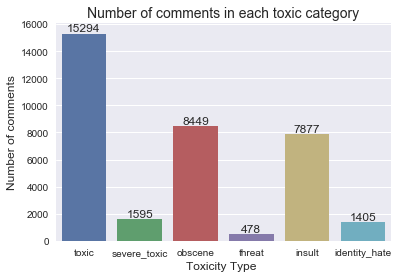

In [32]:
levels = list(df_toxic.columns.values)
sns.set(font_scale = 1)
ax= sns.barplot(levels, df_toxic.iloc[:,:].sum().values)
plt.title("Number of comments in each toxic category", fontsize=14)
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Toxicity Type ', fontsize=12)

rects = ax.patches
labels = df_toxic.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#### Number of comments have multi-labels

In [33]:
rowSums = df_toxic.iloc[:,:].sum(axis=1)
x= rowSums.value_counts().iloc[1:]
print("Percentage of comments with multi-labels : \n{}".format((x/toxic)*100))


Percentage of comments with multi-labels : 
1    39.198767
3    25.941448
2    21.448382
4    10.847458
5     2.372881
6     0.191063
dtype: float64


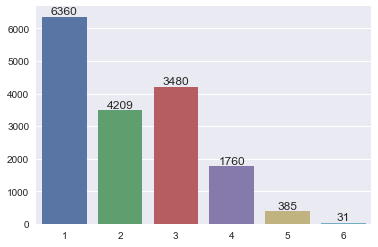

In [34]:
ax = sns.barplot(x.index, x.values)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

#### All severe_toxic comments are also by default gets toxic label

In [35]:
print('Total number of comments labeled as toxic are: {}\n Total number of severe toxic comments are: {}'.format(df['toxic'].sum(), df['severe_toxic'].sum())) 

Total number of comments labeled as toxic are: 15294
 Total number of severe toxic comments are: 1595


In [36]:
# Dataframe that contains all the comments that are labeled as a severe toxic comments
df1 = df[df['severe_toxic']==1]
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0


In [37]:
# Can be seen all the comments which are severe_toxic are labeled as toxic comments 
(df1.severe_toxic == df1.toxic).sum()

1595